In [1]:
import xarray as xr
import matplotlib.pyplot as plt

<xarray.Dataset> Size: 508MB
Dimensions:       (md5sums_dim: 16, tomo_zdim: 40, tomo_ydim: 2520,
                   tomo_xdim: 2520)
Dimensions without coordinates: md5sums_dim, tomo_zdim, tomo_ydim, tomo_xdim
Data variables:
    md5_checksum  (md5sums_dim) int8 16B ...
    tomo          (tomo_zdim, tomo_ydim, tomo_xdim) int16 508MB ...
Attributes:
    zdim_total:             4040
    number_of_files:        101
    zdim_range:             [400 439]
    data_description:       Raw reconstructed tomogram data <ushort>
    voxel_size_xyz:         [0.00265341 0.00265341 0.00265341]
    voxel_unit:             mm
    coord_transform:        \n
    total_grid_size_xyz:    [2520 2520 4040]
    coordinate_origin_xyz:  [-1259 -1259 -2050]
(40, 2520, 2520)


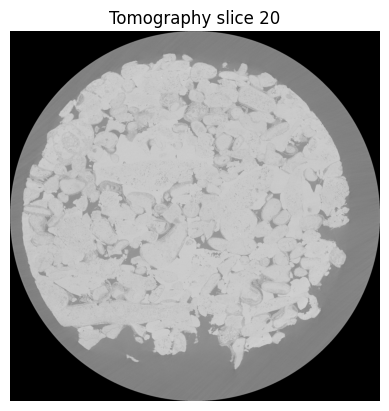

DS attrs: {'zdim_total': np.int32(4040), 'number_of_files': np.int32(101), 'zdim_range': array([400, 439], dtype=int32), 'data_description': 'Raw reconstructed tomogram data <ushort>', 'voxel_size_xyz': array([0.00265341, 0.00265341, 0.00265341], dtype=float32), 'voxel_unit': 'mm', 'coord_transform': '\n', 'total_grid_size_xyz': array([2520, 2520, 4040], dtype=int32), 'coordinate_origin_xyz': array([-1259, -1259, -2050], dtype=int32)}
VAR attrs: {}


In [7]:
ds = xr.open_dataset(r"C:\MEC_ILS\ILS_HR\block00000010.nc", engine="netcdf4")

# Информация о структуре
print(ds)

tomo = ds["tomo"]

print(tomo.shape)

slice_20 = tomo.isel(tomo_zdim=10)
img = slice_20.values.astype(float)
img = (img - img.min()) / (img.max() - img.min())  # нормализация [0, 1]

plt.imshow(img, cmap='gray')
plt.title("Tomography slice 20")
plt.axis('off')
plt.show()

arr = next(iter(ds.data_vars.values()))
print("DS attrs:", ds.attrs)
print("VAR attrs:", arr.attrs)
ds.close()

(40, 2520, 2520) int16


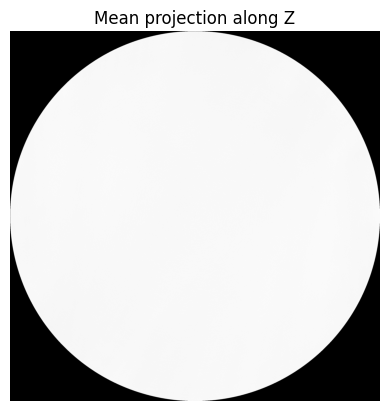

In [22]:
import numpy as np

tomo_np = tomo.values  # np.ndarray формы (40, 2520, 2520)
print(tomo_np.shape, tomo_np.dtype)

# Например, взять среднее по всем слоям (Z):
mean_proj = np.mean(tomo_np, axis=0)

plt.imshow(mean_proj, cmap='gray')
plt.title("Mean projection along Z")
plt.axis('off')
plt.show()

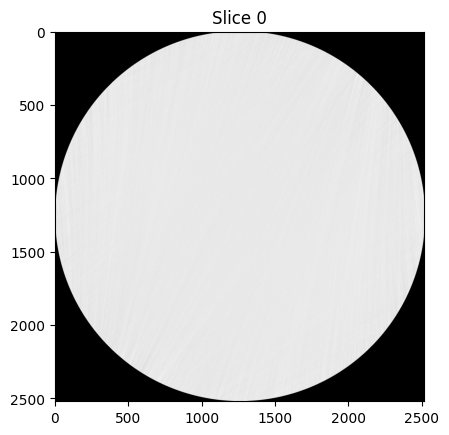

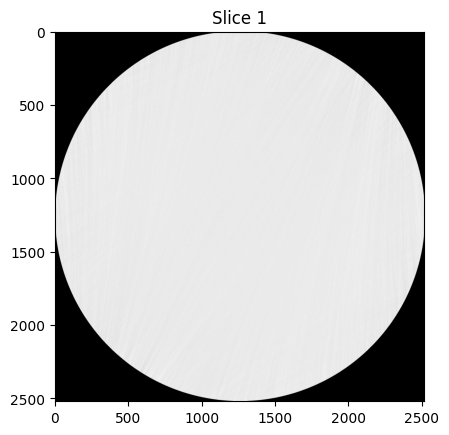

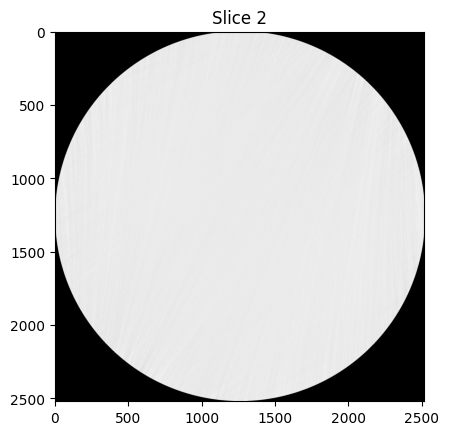

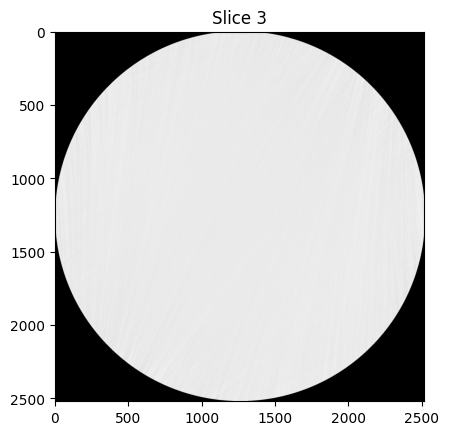

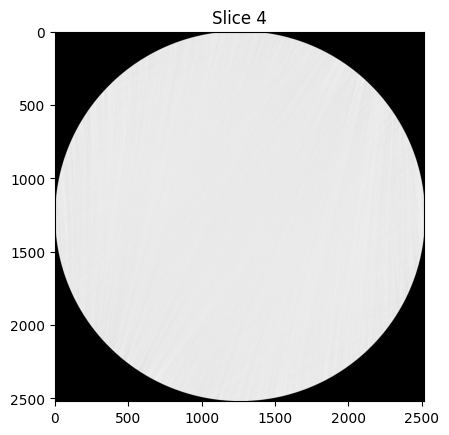

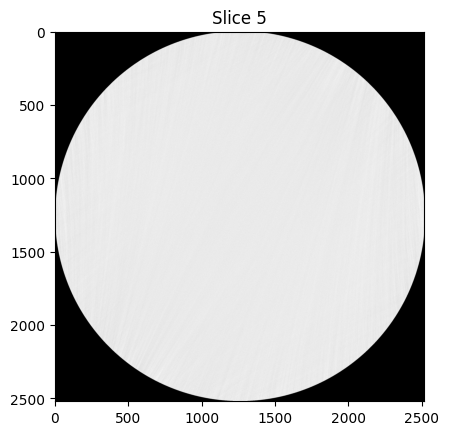

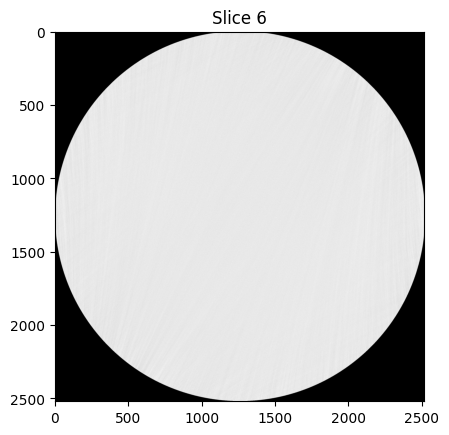

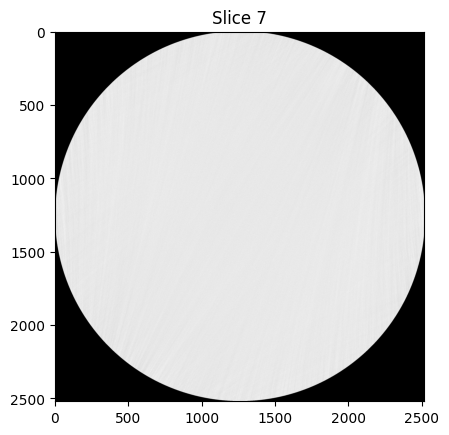

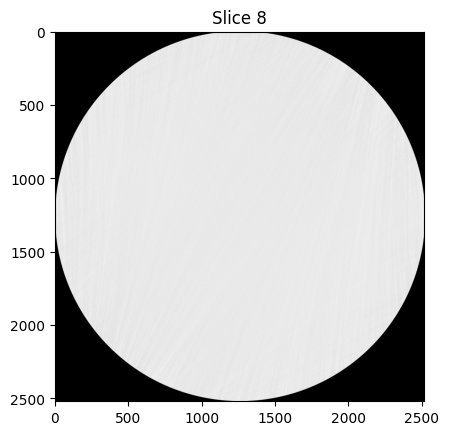

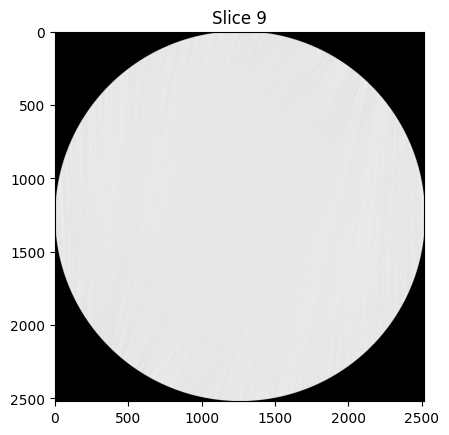

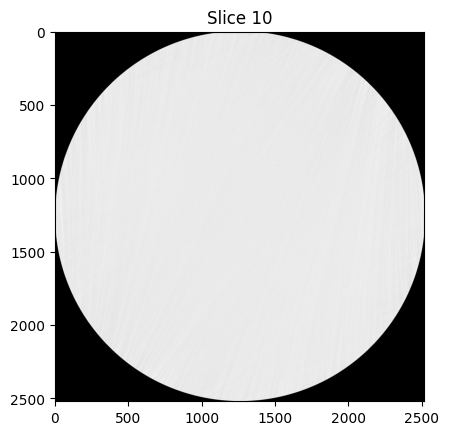

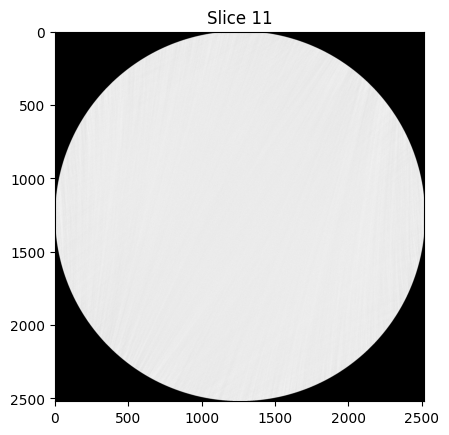

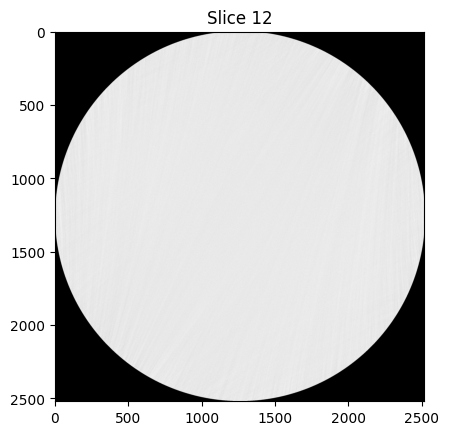

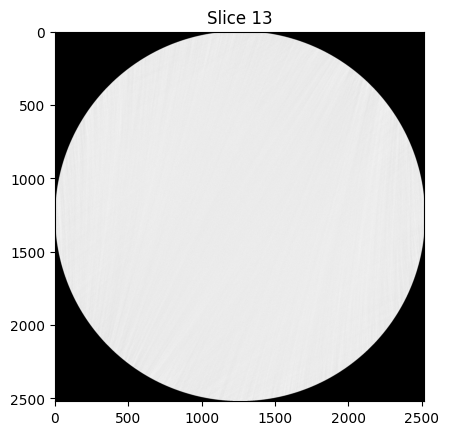

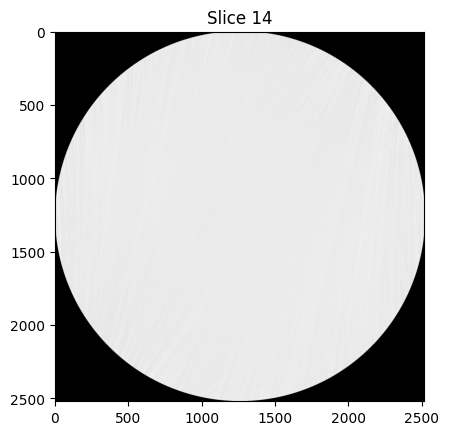

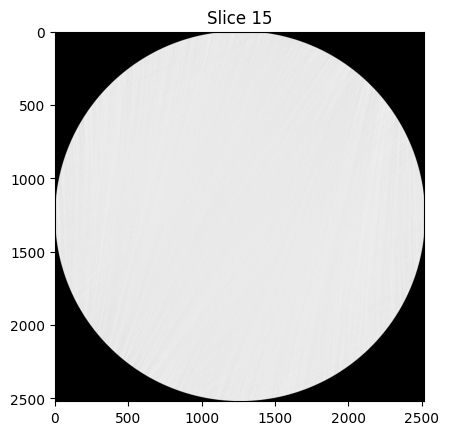

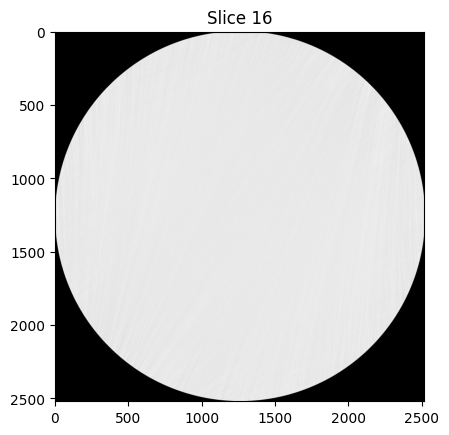

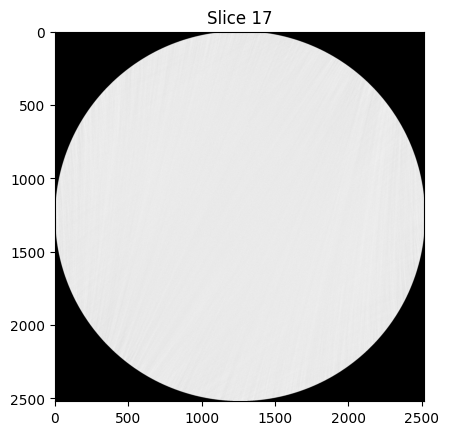

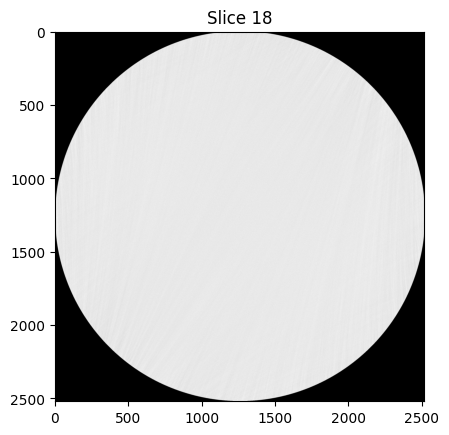

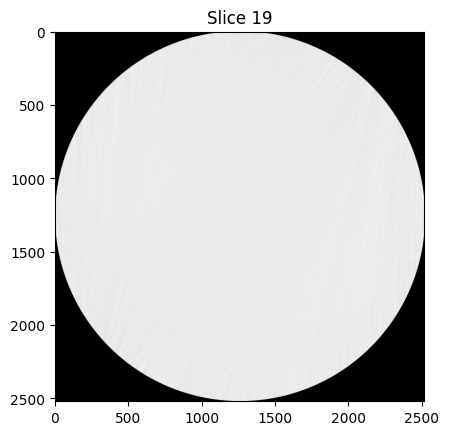

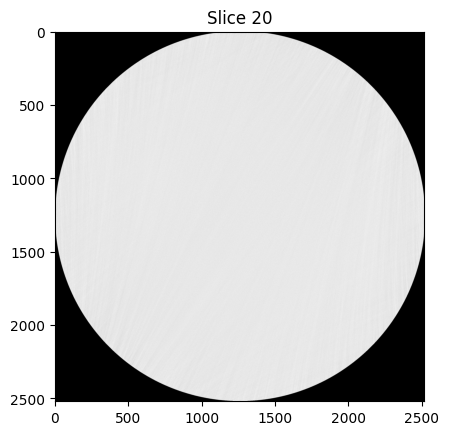

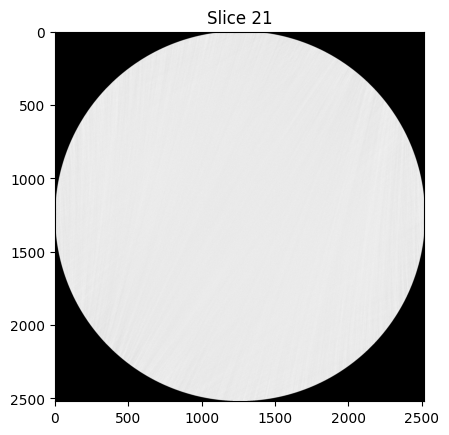

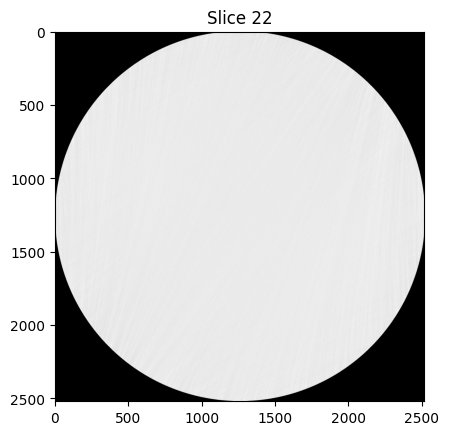

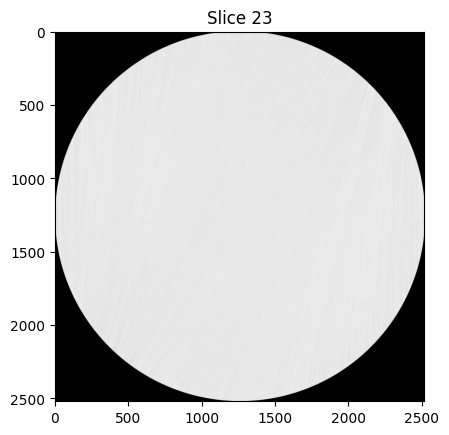

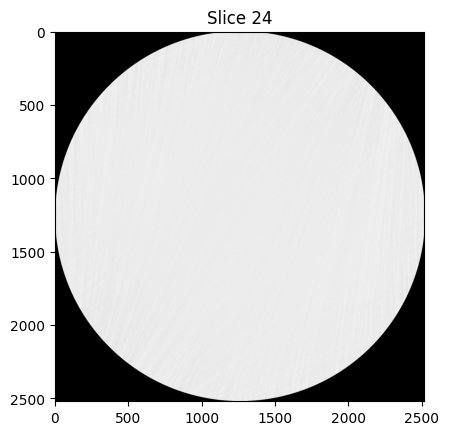

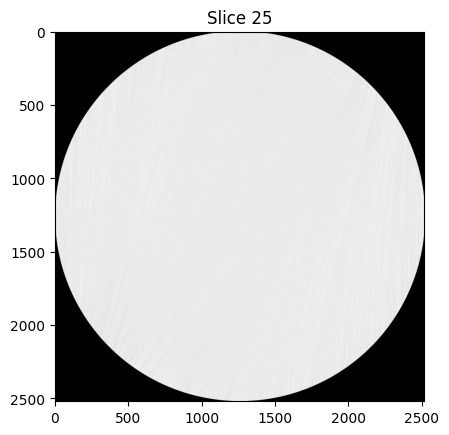

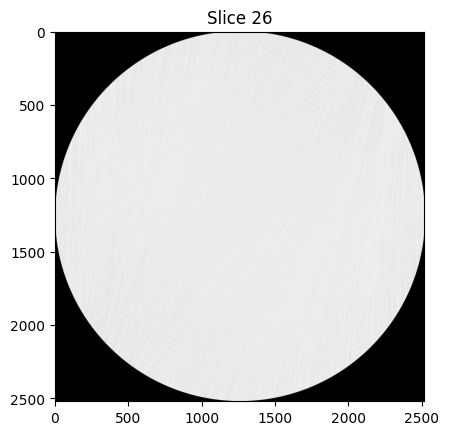

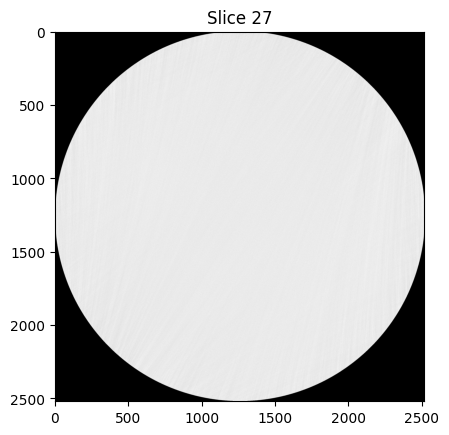

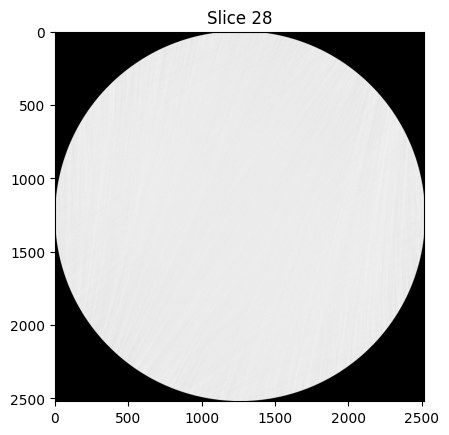

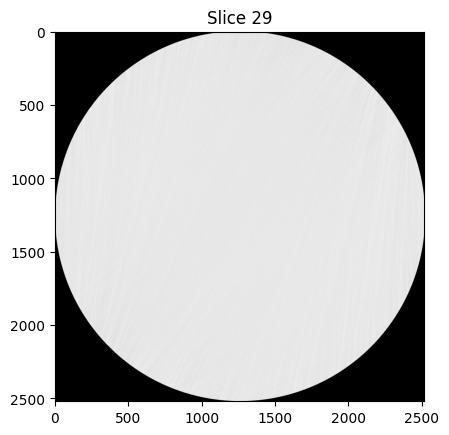

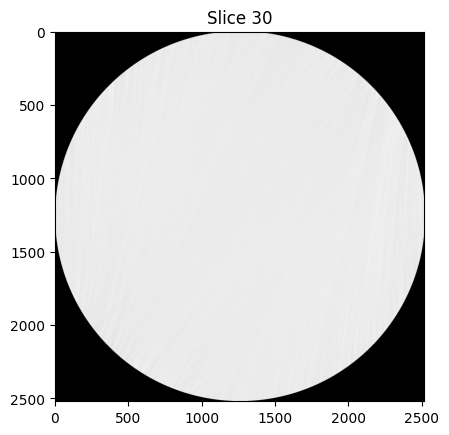

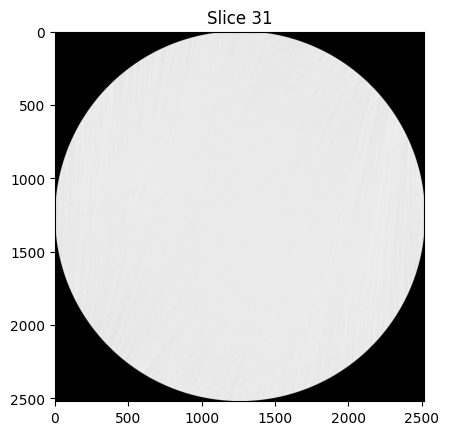

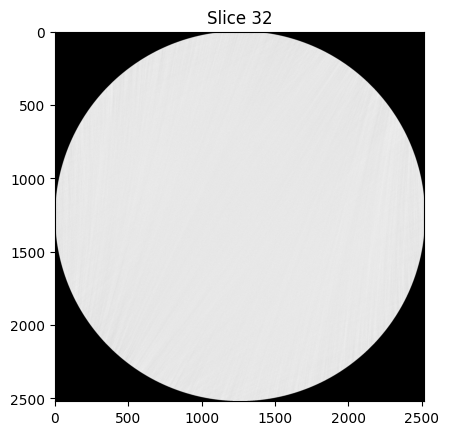

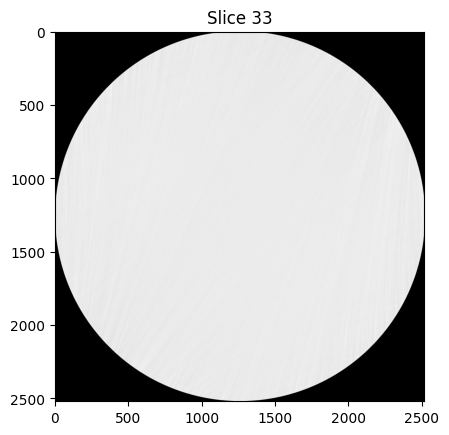

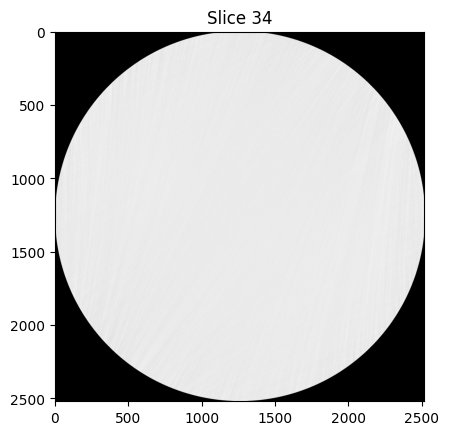

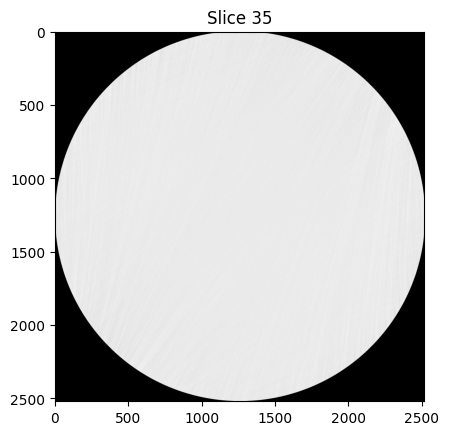

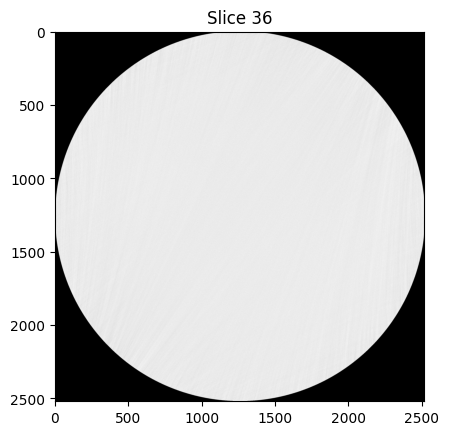

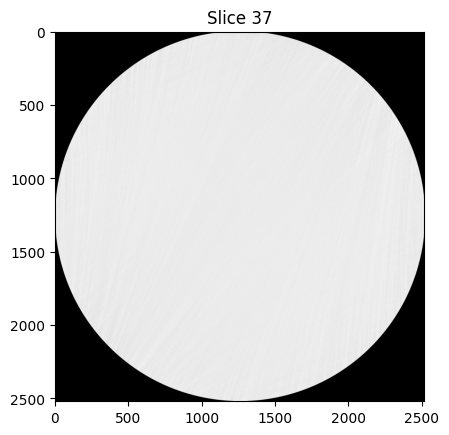

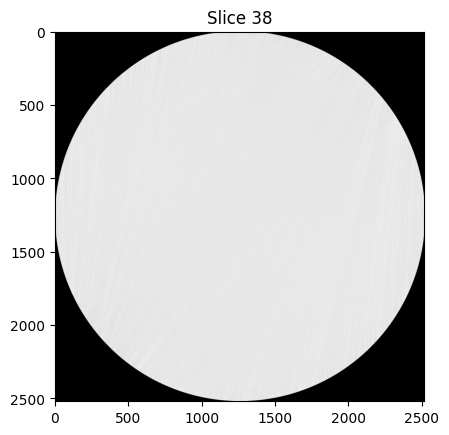

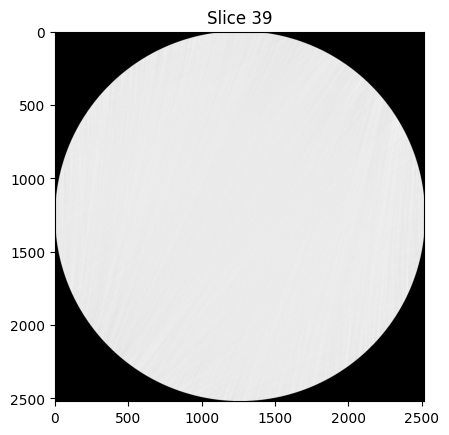

In [23]:
for i in range(0, 40):
    plt.imshow(tomo_np[i], cmap='gray')
    plt.title(f"Slice {i}")
    plt.pause(0.05)
plt.close()

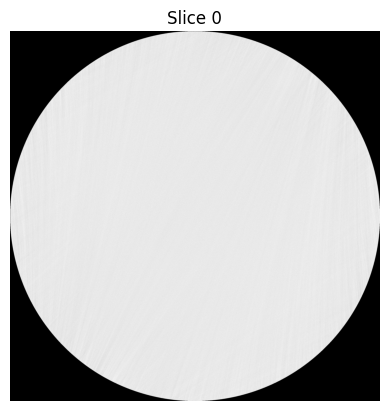

interactive(children=(IntSlider(value=0, description='z', max=39), Output()), _dom_classes=('widget-interact',…

In [10]:
import ipywidgets as widgets
from IPython.display import display

@widgets.interact(z=(0, tomo.shape[0]-1))
def view_slice(z=0):
    plt.imshow(tomo.isel(tomo_zdim=z), cmap='gray')
    plt.title(f"Slice {z}")
    plt.axis('off')
    plt.show()

<xarray.Dataset> Size: 508MB
Dimensions:       (md5sums_dim: 16, tomo_zdim: 40, tomo_ydim: 2520,
                   tomo_xdim: 2520)
Dimensions without coordinates: md5sums_dim, tomo_zdim, tomo_ydim, tomo_xdim
Data variables:
    md5_checksum  (md5sums_dim) int8 16B ...
    tomo          (tomo_zdim, tomo_ydim, tomo_xdim) int16 508MB ...
Attributes:
    zdim_total:             4040
    number_of_files:        101
    zdim_range:             [1160 1199]
    data_description:       Raw reconstructed tomogram data <ushort>
    voxel_size_xyz:         [0.00265341 0.00265341 0.00265341]
    voxel_unit:             mm
    coord_transform:        \n
    total_grid_size_xyz:    [2520 2520 4040]
    coordinate_origin_xyz:  [-1259 -1259 -2050]
(40, 2520, 2520)


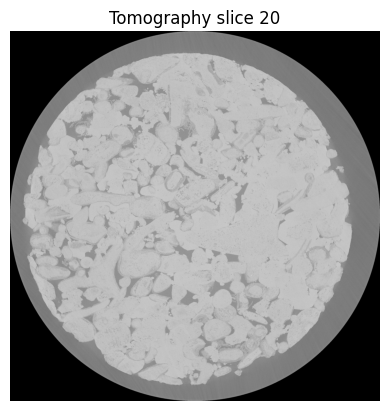

In [19]:
ds = xr.open_dataset(r"C:\MEC ILS\ILS_HR\block00000029.nc", engine="netcdf4")

# Информация о структуре
print(ds)

tomo = ds["tomo"]

print(tomo.shape)

slice_20 = tomo.isel(tomo_zdim=1)
img = slice_20.values.astype(float)
img = (img - img.min()) / (img.max() - img.min())  # нормализация [0, 1]

plt.imshow(img, cmap='gray')
plt.title("Tomography slice 20")
plt.axis('off')
plt.show()

<xarray.Dataset> Size: 509MB
Dimensions:         (md5sums_dim: 16, tomo_zdim: 40, tomo_ydim: 2520,
                     tomo_xdim: 2520, data_histogram_dim: 65531)
Dimensions without coordinates: md5sums_dim, tomo_zdim, tomo_ydim, tomo_xdim,
                                data_histogram_dim
Data variables:
    md5_checksum    (md5sums_dim) int8 16B ...
    tomo            (tomo_zdim, tomo_ydim, tomo_xdim) int16 508MB ...
    data_histogram  (data_histogram_dim) float64 524kB ...
Attributes: (12/20)
    zdim_total:                                                      1000
    number_of_files:                                                 25
    zdim_range:                                                      [ 0 39]
    data_description:                                                Raw reco...
    voxel_size_xyz:                                                  [0.01058...
    voxel_unit:                                                      mm
    ...                               

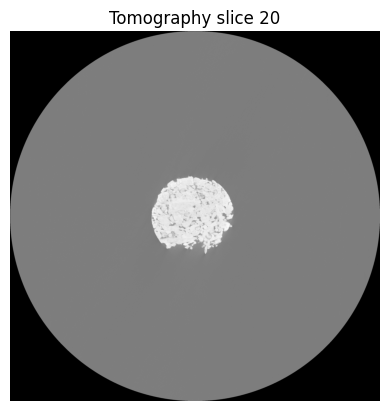

In [24]:
ds = xr.open_dataset(r"C:\MEC ILS\ILS_LR\block00000000.nc", engine="netcdf4")

# Информация о структуре
print(ds)

tomo = ds["tomo"]

print(tomo.shape)

slice_20 = tomo.isel(tomo_zdim=20)
img = slice_20.values.astype(float)
img = (img - img.min()) / (img.max() - img.min())  # нормализация [0, 1]

plt.imshow(img, cmap='gray')
plt.title("Tomography slice 20")
plt.axis('off')
plt.show()

(40, 2520, 2520) int16


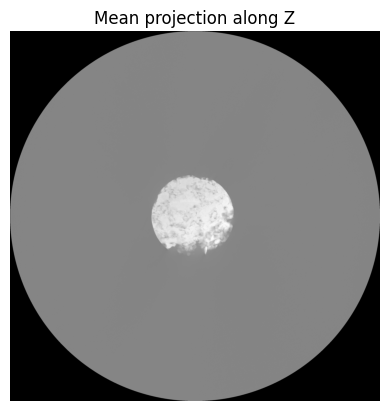

In [29]:
tomo_np = tomo.values  # np.ndarray формы (40, 2520, 2520)
print(tomo_np.shape, tomo_np.dtype)

# Например, взять среднее по всем слоям (Z):
mean_proj = np.mean(tomo_np, axis=0)

plt.imshow(mean_proj, cmap='gray')
plt.title("Mean projection along Z")
plt.axis('off')

plt.savefig("01.png")

plt.show()

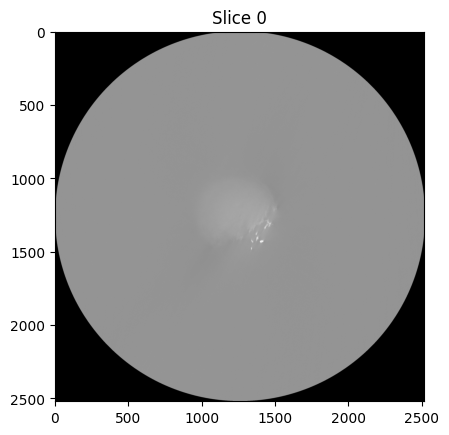

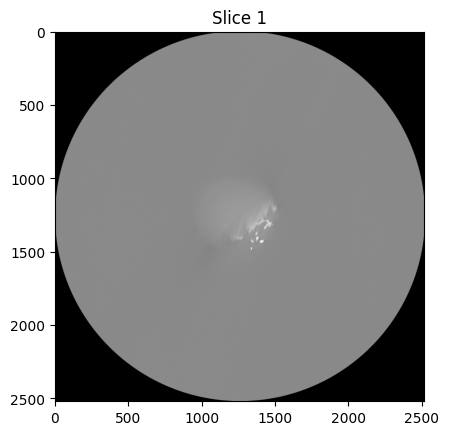

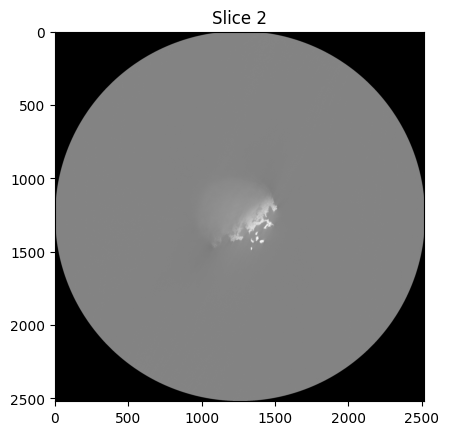

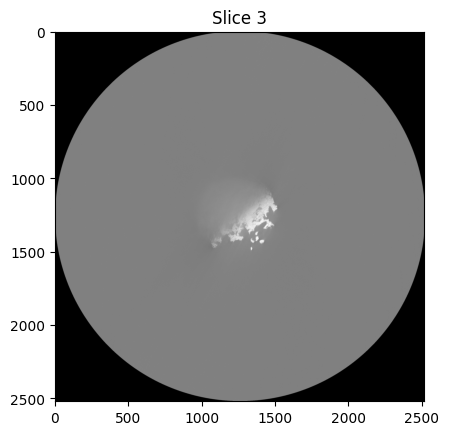

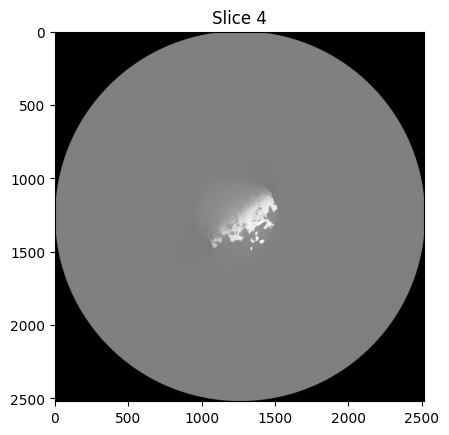

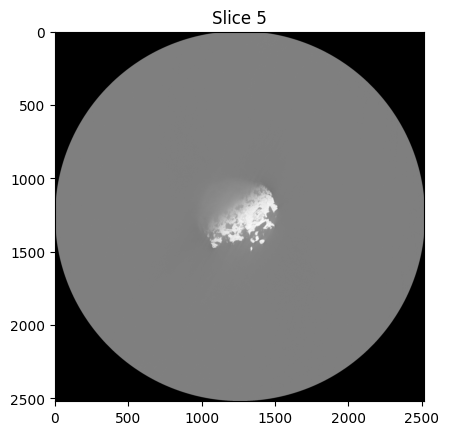

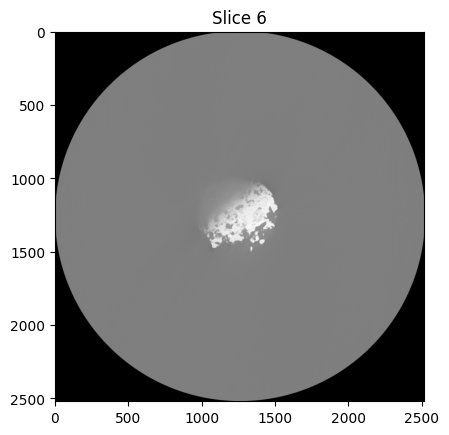

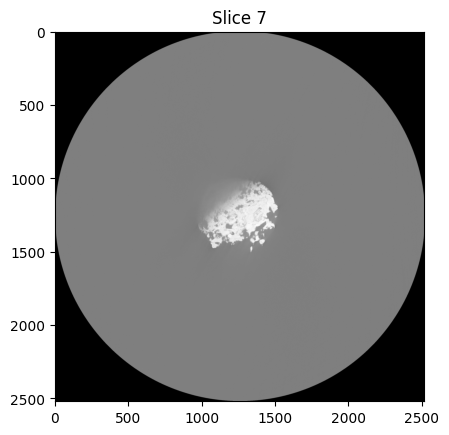

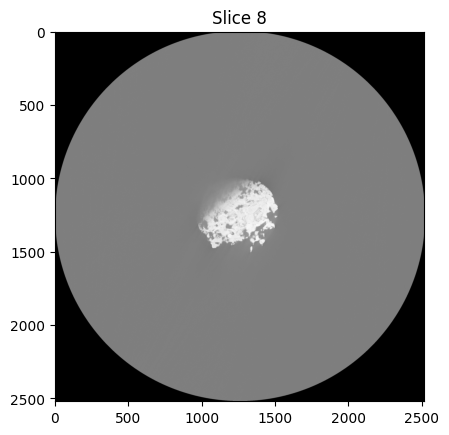

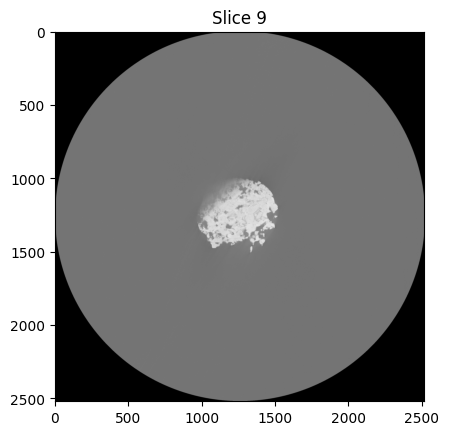

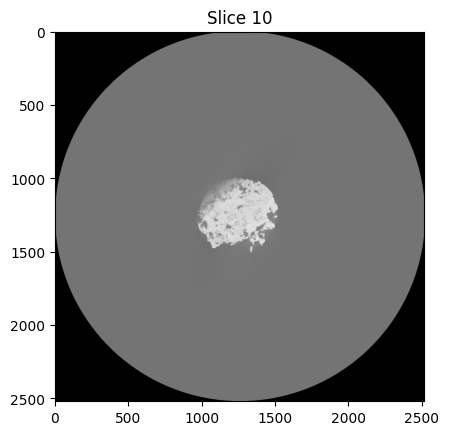

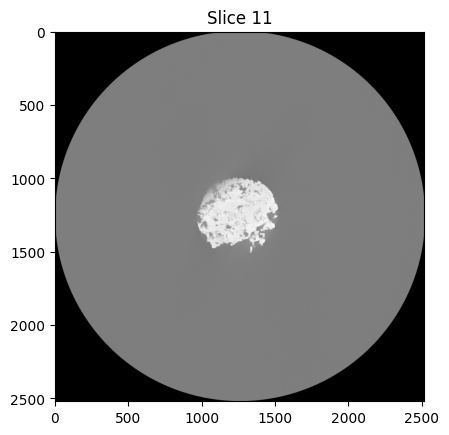

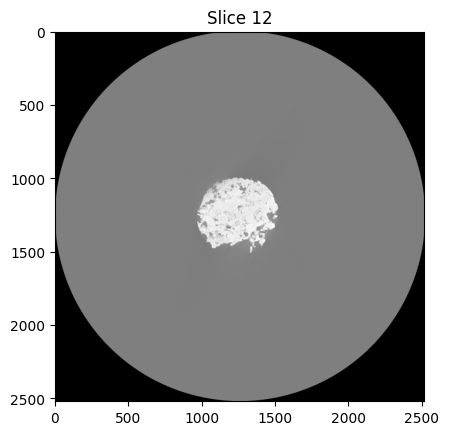

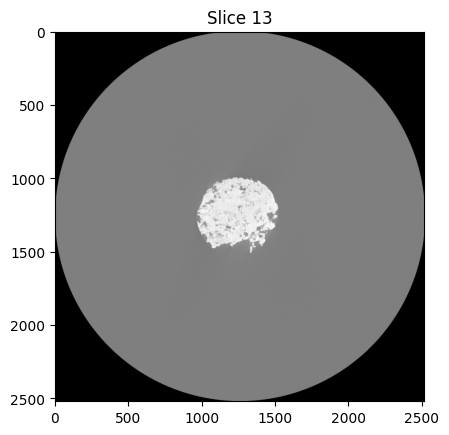

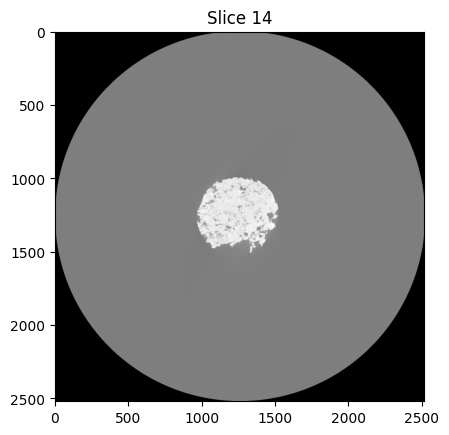

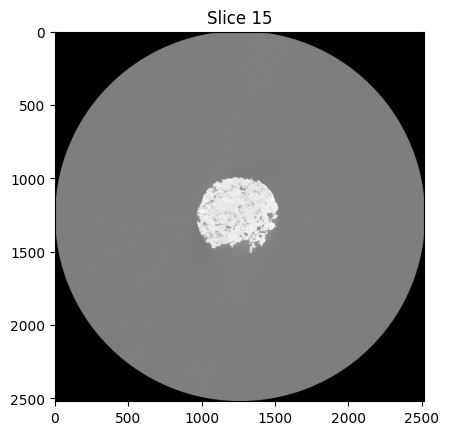

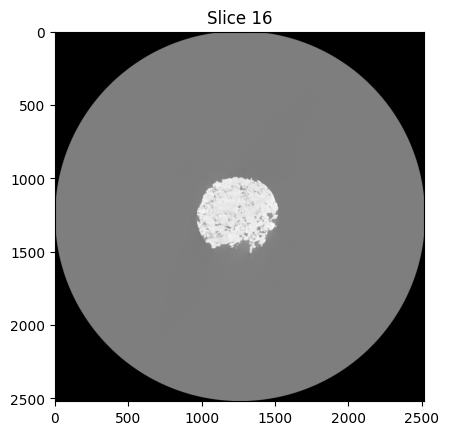

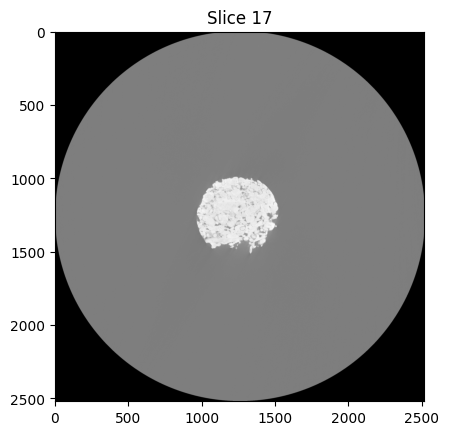

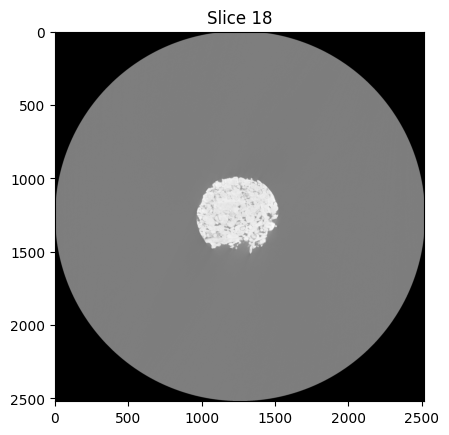

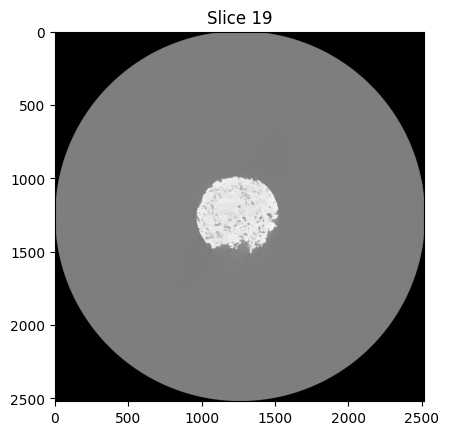

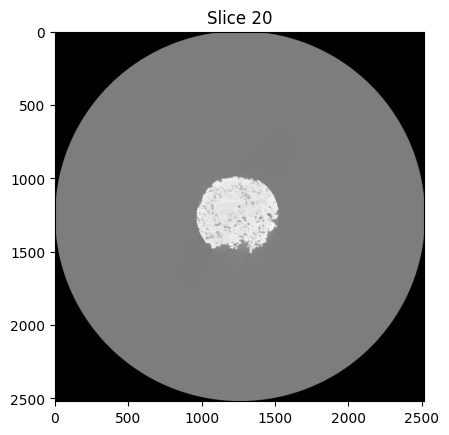

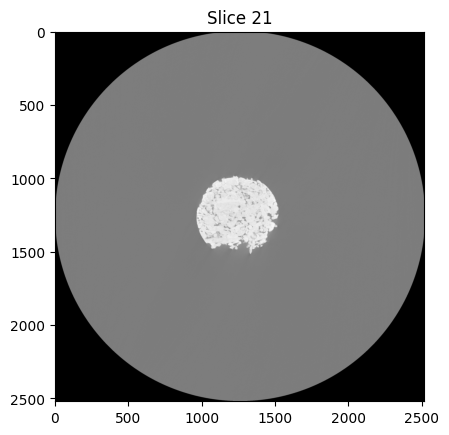

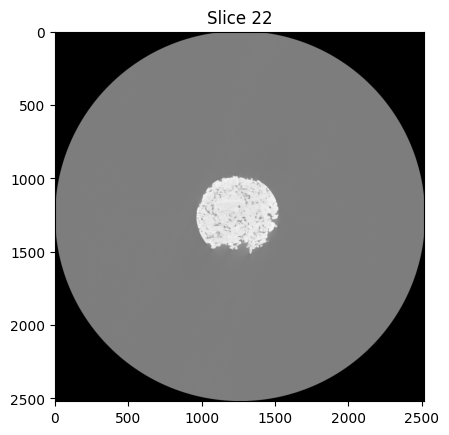

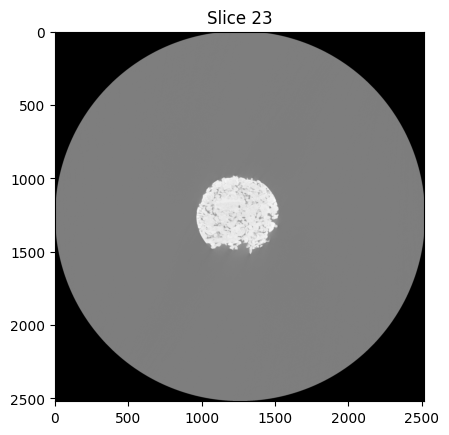

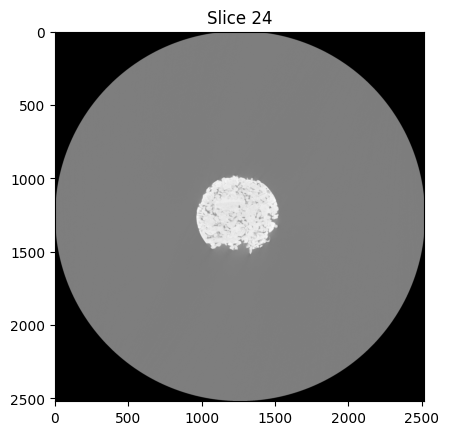

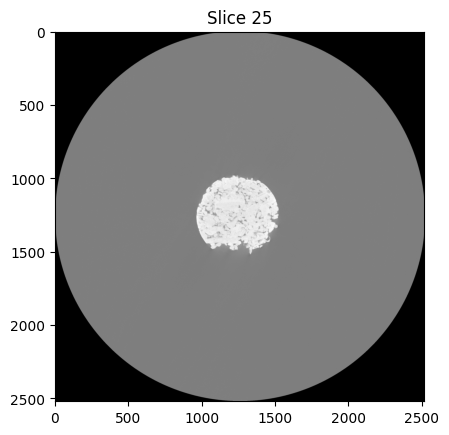

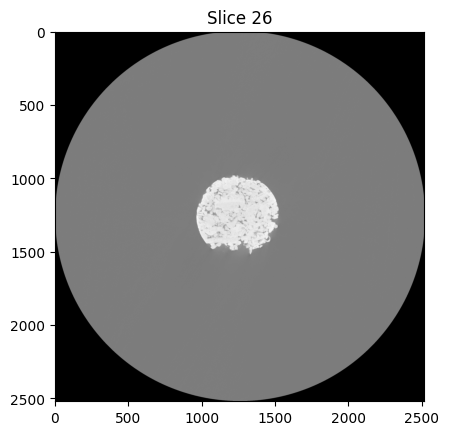

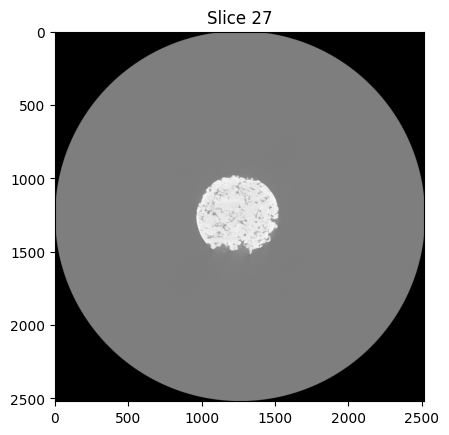

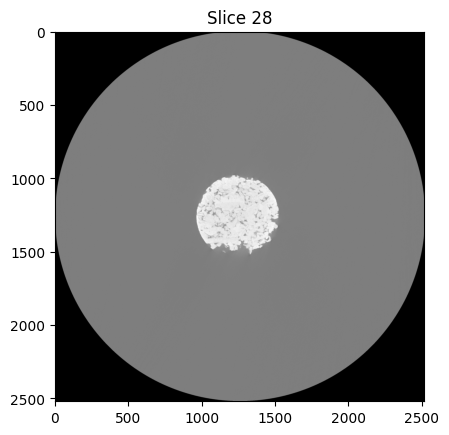

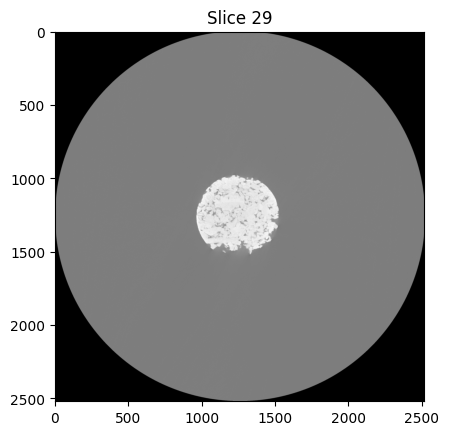

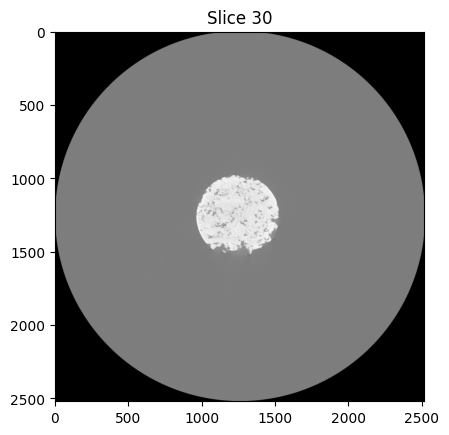

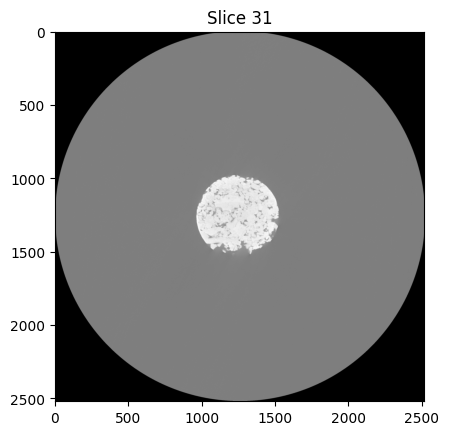

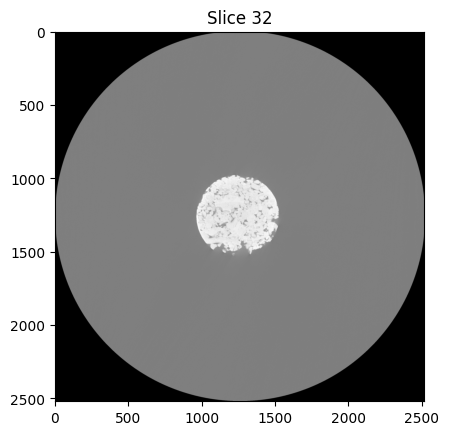

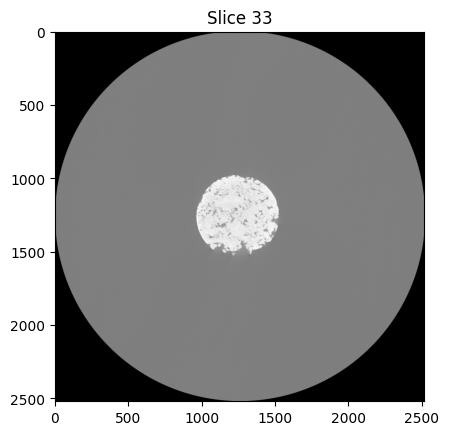

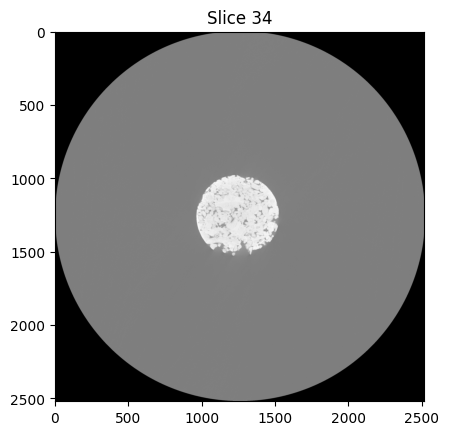

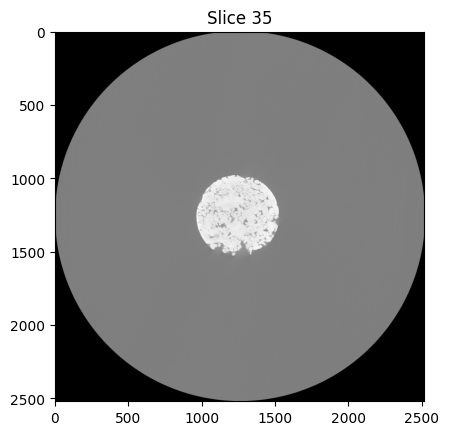

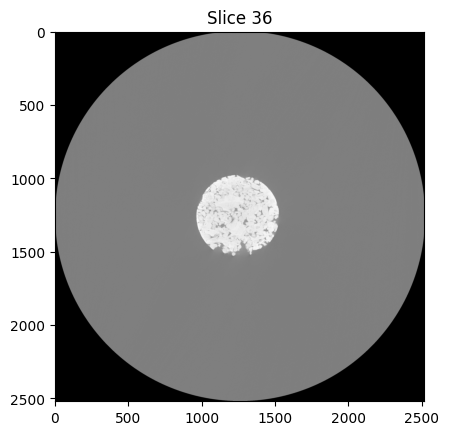

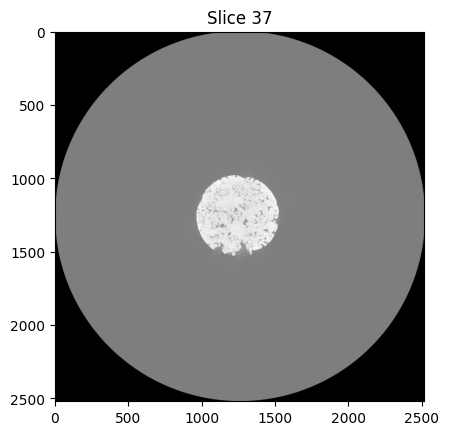

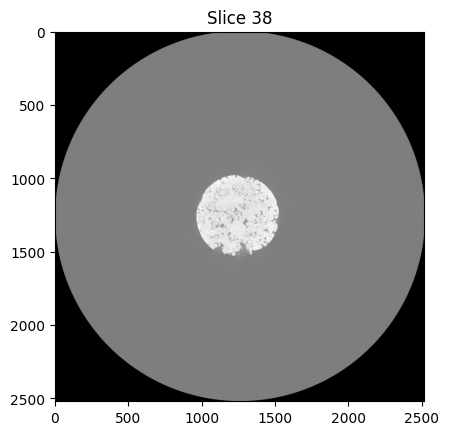

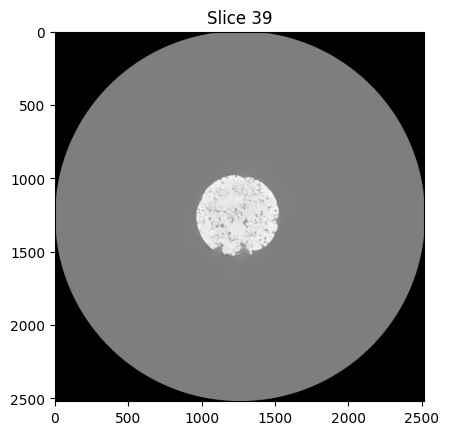

In [26]:
for i in range(0, 40):
    plt.imshow(tomo_np[i], cmap='gray')
    plt.title(f"Slice {i}")
    plt.pause(0.05)
plt.close()

<xarray.Dataset> Size: 508MB
Dimensions:       (md5sums_dim: 16, tomo_zdim: 40, tomo_ydim: 2520,
                   tomo_xdim: 2520)
Dimensions without coordinates: md5sums_dim, tomo_zdim, tomo_ydim, tomo_xdim
Data variables:
    md5_checksum  (md5sums_dim) int8 16B ...
    tomo          (tomo_zdim, tomo_ydim, tomo_xdim) int16 508MB ...
Attributes:
    zdim_total:             1000
    number_of_files:        25
    zdim_range:             [840 879]
    data_description:       Raw reconstructed tomogram data <ushort>
    voxel_size_xyz:         [0.01058982 0.01058982 0.01058982]
    voxel_unit:             mm
    coord_transform:        \n
    total_grid_size_xyz:    [2520 2520 1000]
    coordinate_origin_xyz:  [-1259 -1259  -530]
(40, 2520, 2520)


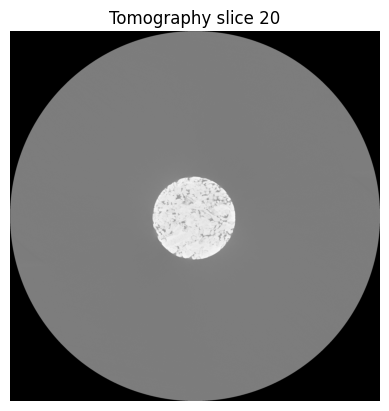

In [8]:
ds = xr.open_dataset(r"C:\MEC_ILS\ILS_LR\block00000021.nc", engine="netcdf4")

# Информация о структуре
print(ds)

tomo = ds["tomo"]

print(tomo.shape)

slice_20 = tomo.isel(tomo_zdim=15)
img = slice_20.values.astype(float)
#img = (img - img.min()) / (img.max() - img.min())  # нормализация [0, 1]

plt.imshow(img, cmap='gray')
plt.title("Tomography slice 20")
plt.axis('off')
plt.show()

ds.close()

<xarray.Dataset> Size: 508MB
Dimensions:       (md5sums_dim: 16, tomo_zdim: 40, tomo_ydim: 2520,
                   tomo_xdim: 2520)
Dimensions without coordinates: md5sums_dim, tomo_zdim, tomo_ydim, tomo_xdim
Data variables:
    md5_checksum  (md5sums_dim) int8 16B ...
    tomo          (tomo_zdim, tomo_ydim, tomo_xdim) int16 508MB ...
Attributes:
    zdim_total:             4040
    number_of_files:        101
    zdim_range:             [840 879]
    data_description:       Raw reconstructed tomogram data <ushort>
    voxel_size_xyz:         [0.00265341 0.00265341 0.00265341]
    voxel_unit:             mm
    coord_transform:        \n
    total_grid_size_xyz:    [2520 2520 4040]
    coordinate_origin_xyz:  [-1259 -1259 -2050]
(40, 2520, 2520)


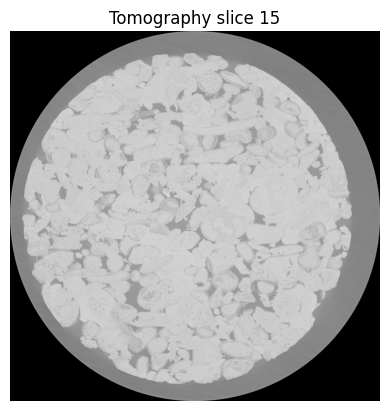

In [9]:
ds = xr.open_dataset(r"C:\MEC_ILS\ILS_HR\block00000021.nc", engine="netcdf4")

# Информация о структуре
print(ds)

tomo = ds["tomo"]

print(tomo.shape)

slice_20 = tomo.isel(tomo_zdim=15)
img = slice_20.values.astype(float)
#img = (img - img.min()) / (img.max() - img.min())  # нормализация [0, 1]

plt.imshow(img, cmap='gray')
plt.title("Tomography slice 15")
plt.axis('off')
plt.show()

ds.close()